# LABORATORIO 4 - Práctica 4: Agrupamiento de jugadores en videojuegos
---
<img src="ufv.png" width="100px" height="100px"></img> 
### Integrantes: 
* Julián Prieto Velasco   
* Guillermo Ramírez Cárdenas
* Pedro Paniagua Falo     
* Javier Muñoz Rojas

---

## **Índice**
1. [Introducción](#id0)
1. [Apartado 1: Prueba varias configuraciones y crea una tabla con toda la información](#id1)
1. [Apartado 2: Elige la mejor configuración, dibuja como van modificandose los grupos y obten una conclusión](#id2)
1. [Apartado 3: Estudia  qué técnicas  de  preprocesamiento  se  podrían  incluir  en  base  al  error  cometido  en  cada  cluster](#id3)

---

<div id='id0'>

## Introducción
---
Bluehole, la empresa encargada del videojuego PlayerUnknown’s  Battlegrounds quiere introducir nuevos paquetes dependiendo del tipo de jugador. Para ello dispone de estadísticas de los 200 mejores jugadores. Aplica un algoritmo de manera que se obtengan dichos grupos

---

### Importar Librerías
---

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib.pyplot as plt
%matplotlib inline


### Leemos el fichero PUBG.csv
---

In [ ]:
# Cargar datos del archivo CSV
df = pd.read_csv("Dataset_Lab04\Dataset_Lab04\PUBG.csv")

df.head(15)

,player_name,tracker_id,solo_KillDeathRatio,solo_WinRatio,solo_TimeSurvived,solo_RoundsPlayed,solo_Wins,solo_WinTop10Ratio,solo_Top10s,solo_Top10Ratio,...,squad_RideDistance,squad_MoveDistance,squad_AvgWalkDistance,squad_AvgRideDistance,squad_LongestKill,squad_Heals,squad_Revives,squad_Boosts,squad_DamageDealt,squad_DBNOs
0,BreakNeck,4405,3.14,17.65,18469.14,17,3,0.83,4,23.5,...,3751590.99,5194786.58,2626.97,4372.64,536.98,2186,234,1884,242132.73,1448
1,Blackwalk,8199,4.41,18.18,33014.86,33,6,0.36,11,33.3,...,4295917.30,6051783.67,2422.48,6009.73,734.85,2041,276,2340,269795.75,1724
2,mercedes_benz,4454,3.60,0.00,4330.44,5,0,0.00,1,20.0,...,3935265.63,5589608.74,1871.89,3011.87,725.44,1766,210,2193,292977.07,1897
3,DORA,7729,14.00,50.00,13421.82,8,4,0.67,6,75.0,...,2738998.00,3796916.00,2154.62,5578.41,587.28,1214,142,1252,181106.90,1057
4,n2tstar,0,10.50,33.33,9841.04,6,2,0.40,5,83.3,...,2347295.00,3220260.00,2098.47,5642.54,546.10,1245,120,923,160029.80,1077
5,coldoxygen,33313,5.73,31.25,22003.22,16,5,0.50,10,62.5,...,3218436.00,4733977.00,2078.93,4414.86,1212.76,2023,195,2307,238640.00,1450
6,Giken,15585,2.45,8.45,148051.25,142,12,0.18,34,23.9,...,2057423.12,2883099.31,1664.77,3022.51,564.20,1274,133,1320,132008.88,775
7,KoreaNo1,9454,2.71,26.32,26091.14,19,5,0.50,10,52.6,...,3586593.00,4854387.00,1635.86,4627.86,806.24,2199,163,1864,201659.00,1287
8,undor,24029,3.68,13.64,49282.41,44,6,0.23,13,29.5,...,1054263.00,1550975.00,2207.61,4685.61,455.67,617,61,585,80498.73,513
9,Fordune,11289,4.17,25.00,10280.77,8,2,0.25,4,50.0,...,2793909.91,4071039.87,1981.29,3635.28,546.95,1320,220,1338,123573.74,675


Como se puede ver en la DataFrame, para un algoritmo de clustering va a ser complicado su aplicación ya que hay una enorme cantidad de características que analizar.

Por ello es que se ha optado por realizar un algoritmo de análisis de componentes (PCA), ya que es una técnica para identificar las variables que contribuyen más a la varianza en los datos y reducir la dimensión del conjunto de datos.

Después de esto podremos realizar el algoritmo Kmeans.

### Preprocesamiento
---

* Eliminamos las columnas que no son necesarias
* Eliminamos los datos nulos

Primero realizaremos un algoritmo de PCA, ya que nos encontramos un DataFrame que es muy grande (muchas columnas), por lo que necesitamos reducir la dimensionalidad del conjunto de datos.

Después para normalizar los datos y poder utilizar el algoritmo K-means es necesario convertir los valores en una misma escala. Utilizaremos la estandarización de los datos, la cual consiste en convertir los valores de cada variable a una escala que tenga media cero y desviación estándar igual a uno. 

Para ello, se puede utilizar la fórmula:

**x_norm = (x - media) / desviación estándar**

Donde:
* 'x' es el valor de la variable
* 'media' es la media de la variable
* 'desviación estándar' es la desviación estándar de la variable.


In [ ]:
#Eliminamos las columnas innecesarias, normalizamos los datos
df = df.drop(["player_name", "tracker_id", "solo_RevivesPg", "solo_WeaponAcquired", "solo_Revives", "solo_DBNOs", "duo_WeaponAcquired", "squad_WeaponAcquired"], axis=1)
# eliminar filas con valores faltantes
DataF_preparado = df.dropna()
print(DataF_preparado)


    solo_KillDeathRatio  solo_WinRatio  solo_TimeSurvived  solo_RoundsPlayed  \
0                  3.14          17.65           18469.14                 17   
1                  4.41          18.18           33014.86                 33   
2                  3.60           0.00            4330.44                  5   
3                 14.00          50.00           13421.82                  8   
4                 10.50          33.33            9841.04                  6   
..                  ...            ...                ...                ...   
94                 3.37          17.33          581263.40                427   
95                 6.00          27.27           15639.28                 11   
96                 3.05           9.84          243659.10                193   
97                 0.00           0.00             561.04                  1   
98                 3.10          16.67           17552.90                 12   

    solo_Wins  solo_WinTop10Ratio  solo

En el procesamiento se eliminan las columnas que no nos aportan ningún dato relevante acerca de los jugadores. Tales como:

"player_name", "tracker_id", "solo_RevivesPg", "solo_WeaponAcquired", "solo_Revives", "solo_DBNOs", "duo_WeaponAcquired", "squad_WeaponAcquired"

* Las dos primeras se eliminan porque son el nombre e id del jugador.
* Las demás son columnas las cuales todos los jugadores tienen un 0 en el dato, por lo tanto, podemos eliminarlas.

### Algoritmo PCA para sacar las columnas más influyentes y poder reducir así la dimensionalidad del 
### Data Frame creado a partir del CSV

---

Utilizamos la librería PCA para realizar la disminucion de la dimensionalidad del conjunto de datos

In [ ]:
# realizar un análisis de componentes principales (PCA)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(DataF_preparado)



Normalizamos los datos utilizando Standard Scaler

In [ ]:
# Instanciar un objeto StandardScaler
scaler = StandardScaler()

# Ajustar el objeto StandardScaler a los datos seleccionados
scaler.fit(DataF_preparado)
# Transformar los datos seleccionados con el objeto StandardScaler
DataF_Final = scaler.transform(DataF_preparado)

# Convertir la matriz resultante en un DataFrame
DataF_Final1 = pd.DataFrame(DataF_Final)
print(DataF_Final1)


         0         1         2         3         4         5         6    \
0  -0.297509  0.182263 -0.570158 -0.613489 -0.472220  2.000115 -0.546539   
1   0.243193  0.226206 -0.472008 -0.467578 -0.284470 -0.034545 -0.408911   
2  -0.101664 -1.281126 -0.665561 -0.722922 -0.659970 -1.593008 -0.605522   
3   4.326132  2.864452 -0.604216 -0.695564 -0.409636  1.307464 -0.507217   
4   2.836009  1.482316 -0.628378 -0.713803 -0.534803  0.138617 -0.526878   
..       ...       ...       ...       ...       ...       ...       ...   
94 -0.199586  0.155731  3.227405  3.125479  3.971197  0.052036  3.208731   
95  0.920135  0.979872 -0.589253 -0.668206 -0.472220  1.004430 -0.526878   
96 -0.335826 -0.465276  0.949355  0.991531  0.529114 -0.510742  0.888721   
97 -1.634363 -1.281126 -0.690996 -0.759400 -0.659970 -1.593008 -0.625183   
98 -0.314539  0.101010 -0.576340 -0.659086 -0.534803  0.138617 -0.526878   

         7         8         9    ...       134       135       136       137  \
0  -0.

<div id='id1'/>

## Apartado 1 - Prueba varias configuraciones y crea una tabla con toda la información
---

Utiliza varias configuraciones teniendo en cuenta el número de grupos que se creará y cambiando cómo se  mide  la  distancia  entre  individuos.  Crea una  tabla  donde  se  incluya  toda  la  información  y  el  número necesario de iteraciones para llegar a dicha solución. Se considera la mejor solución aquella que necesite menos iteraciones

Definimos varios nº de clusters y varias métricas de distancia, para probar diferentes configuraciones.



In [ ]:
# Definir los parámetros para el algoritmo K-means
n_clusters = [2, 3, 4, 5, 6]
distances = ['euclidean', 'manhattan', 'cosine']

results = []
for n in n_clusters:
    for d in distances:
        kmeans = KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter=300, random_state=0)
        kmeans.fit(principalComponents)
        silhouette = silhouette_score(principalComponents, kmeans.labels_)
        results.append({'n_clusters': n, 'distance': d, 'silhouette_score': silhouette, 'iterations': kmeans.n_iter_})

# Visualizar los resultados en una tabla
DataF_resultados = pd.DataFrame(results)
# Lo ordenamos por las menores iteraciones
#DataF_resultados = DataF_resultados.sort_values(by='iterations')
print(DataF_resultados)

    n_clusters   distance  silhouette_score  iterations
0            2  euclidean          0.487005           2
1            2  manhattan          0.487005           2
2            2     cosine          0.487005           2
3            3  euclidean          0.504295           4
4            3  manhattan          0.504295           4
5            3     cosine          0.504295           4
6            4  euclidean          0.520451           9
7            4  manhattan          0.520451           9
8            4     cosine          0.520451           9
9            5  euclidean          0.450528           7
10           5  manhattan          0.450528           7
11           5     cosine          0.450528           7
12           6  euclidean          0.481107          12
13           6  manhattan          0.481107          12
14           6     cosine          0.481107          12


La puntuación de Silueta (Silhouette score en inglés) es una métrica utilizada para evaluar la calidad de los clusters obtenidos por un algoritmo de clustering, como K-means. 

Esta métrica mide la similitud de cada punto de datos en su propio cluster en comparación con otros clusters, y proporciona una puntuación que oscila entre -1 y 1. Cuanto mayor sea la puntuación de Silueta, mejor será la calidad de los clusters obtenidos.

<div id='id2'/>

## Apartado 2 - Elige la mejor configuración, dibuja como van modificandose los grupos y obten una conclusión
---

Con la mejor configuración del punto anterior. Utiliza dos criterios para elegir el lugar inicial del punto central de los grupos. Dibuja cómo se van modificando los grupos y cómo van cambiando sus  centroides  en  cada  iteración. Obtén  una  conclusión  acerca  de  dónde  deberían  situarse  los  centroides.

*PODEMOS VER QUE LAS MEJORES CONFIGURACIONES PARA LAS MENORES ITERACIONES SON:*
* Métrica de distancia -> Euclidea y nº de clusters = 2
* Métrica de distancia -> Manhattan y nº de clusters = 2
* Métrica de distancia -> Cousine y nº de clusters = 2

Para hacer esta parte, crearemos una funcion para pintar las gráficas de clusters y veremos como van cambiando estos.
Toma como entrada los centroides, las etiquetas de los clusters y los datos del PCA.

In [ ]:
# Definir función para graficar clusters
def pintar_clusters(ax, centroids, labels, P2):
    colors = ['b', 'g', 'r']
    for i in range(centroids.shape[0]):
        idx = np.where(labels == i)[0]
        ax.scatter(P2[idx,0], P2[idx,1], color=colors[i])
        ax.scatter(centroids[i,0], centroids[i,1], marker='x', color='k', s=100)
        ax.set_xlabel('PC 1')
        ax.set_ylabel('PC 2')
principalComponents = pd.DataFrame(principalComponents)
Array_componentes = np.array(principalComponents)

Según los resultados del Clustering anterior, la mejor configuración que se utiliza será con dos clusters:

Se realiza con dos criterios:

1. Con la inicialización de los centroides de manera aleatoria
2. Con la inicialización de los centroides de manera k-means++

#### *Primer criterio: inicialización de centroides de manera aleatoria*

In [ ]:
# Número de clusters
K = 2

# Inicializar los centroides aleatoriamente
np.random.seed(123) # Para que los resultados sean reproducibles
centroids = np.zeros((K, principalComponents.shape[1]))
for i in range(K):
    idx = np.random.choice(principalComponents.shape[0])
    centroids[i, :] = principalComponents.iloc[idx, :]
# Almacenar los centroides y las etiquetas de los puntos en cada iteración
centroids_history = [centroids]
labels_history = []

En este codigo se realiza un for para realizar la modificación de los centroides para ver la evolución porsteriormente en las gráficas.

Se itera dos veces ya que el número de clusters son dos y por lo tanto se representarán solamente dos gráficas.

In [ ]:
# Iterar 2 veces
for i in range(2):
    # Calcular las distancias entre los puntos y los centroides
    distances = np.sqrt(np.sum((Array_componentes[:, np.newaxis, :] - centroids)**2, axis=2))

    # Asignar cada punto al centroide más cercano
    labels = np.argmin(distances, axis=1)

    # Guardar los labels de los puntos
    labels_history.append(labels)

    # Calcular los nuevos centroides
    new_centroids = np.array([principalComponents[labels == j].mean(axis=0) for j in range(centroids.shape[0])])

    # Guardar los nuevos centroides
    centroids_history.append(new_centroids)

    # Actualizar los centroides
    centroids = new_centroids

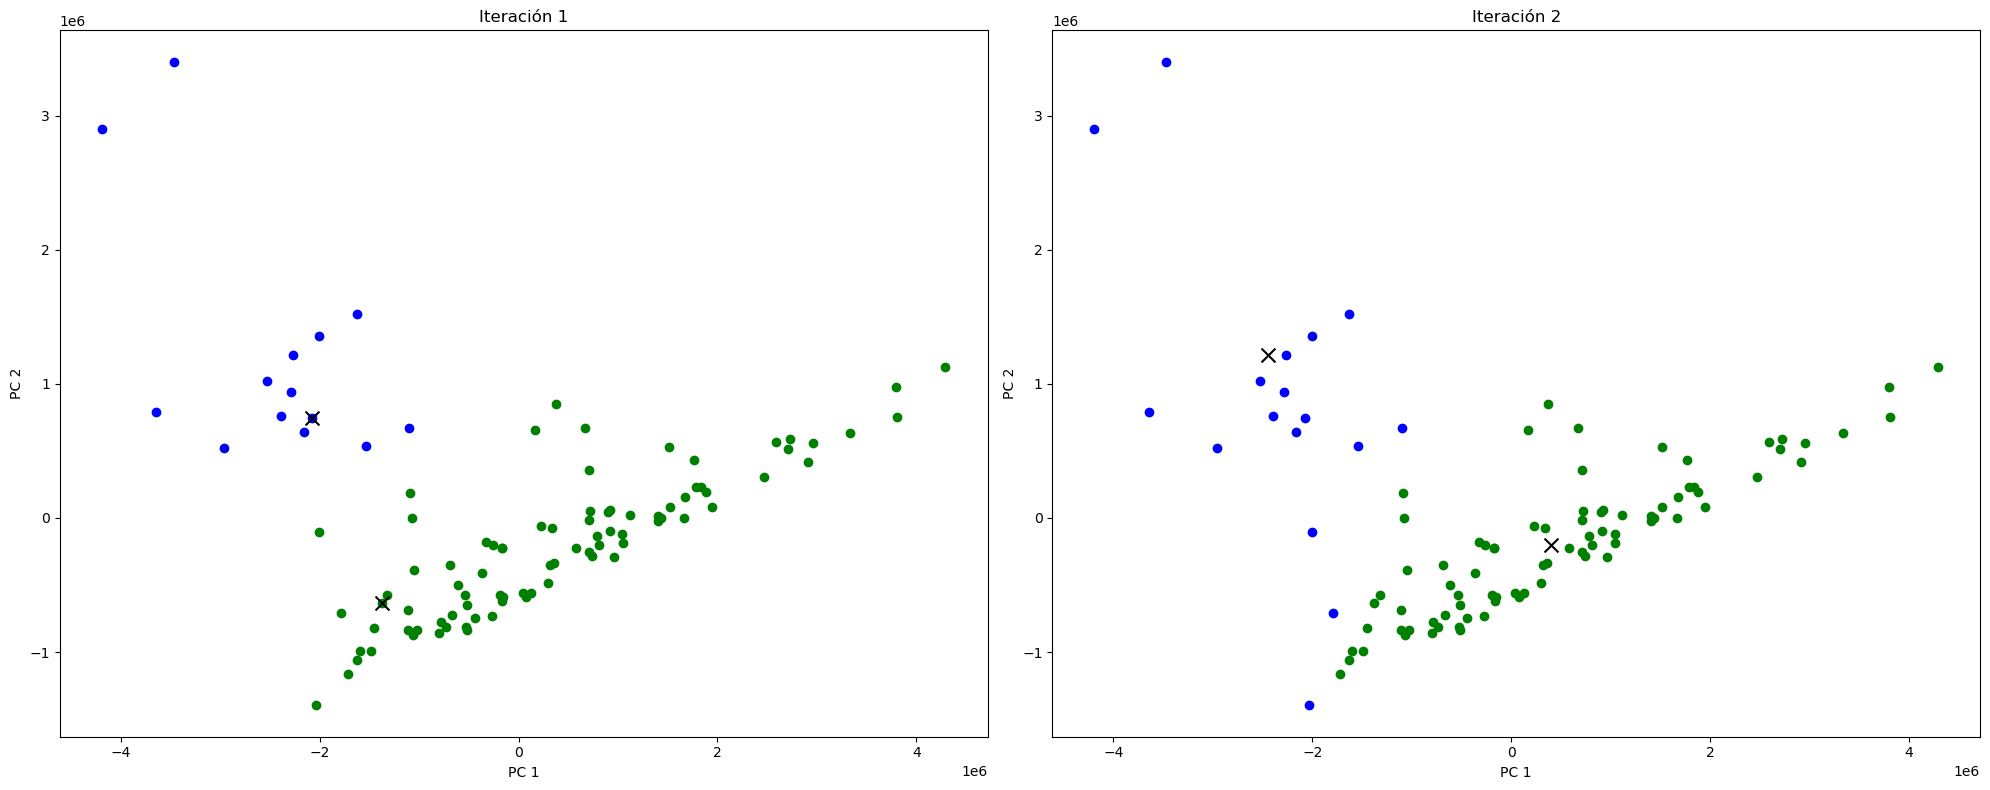

In [ ]:
# Graficar las iteraciones
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

for i, (centroids, labels) in enumerate(zip(centroids_history, labels_history)):
    pintar_clusters(axes[i], centroids, labels, principalComponents.values)
    axes[i].set_title(f"Iteración {i+1}")

plt.tight_layout()
plt.show()

#### *Segundo criterio: inicialización de centroides de manera k-means++*

Se crea la función para la inicialización de los centroides utilizando la distancia euclídea.

In [ ]:
def kmeans_plusplus_initialization(data, K):
    np.random.seed(123)
    centroids = np.zeros((K, data.shape[1]))
    
    # Elegir el primer centroide aleatoriamente
    idx = np.random.choice(data.shape[0])
    centroids[0, :] = data.iloc[idx, :]
    
    # Inicialización de los centroides restantes
    for i in range(1, K):
        # Calcular las distancias al cuadrado de cada punto a los centroides existentes
        distances = euclidean_distances(data, centroids[:i, :]) ** 2
        # Calcular la distancia mínima al cuadrado de cada punto a los centroides existentes
        min_distances = np.min(distances, axis=1)
        # Calcular las probabilidades proporcionales a las distancias mínimas al cuadrado
        probabilities = min_distances / np.sum(min_distances)
        # Elegir un nuevo centroide según las probabilidades
        idx = np.random.choice(data.shape[0], p=probabilities)
        centroids[i, :] = data.iloc[idx, :]
    
    return centroids

In [ ]:

# Número de clusters
K = 2

# Inicializar los centroides con k-means++
centroids = kmeans_plusplus_initialization(principalComponents, K)

# Almacenar los centroides y las etiquetas de los puntos en cada iteración
centroids_history = [centroids]
labels_history = []


In [ ]:
# Iterar 2 veces
for i in range(2):
    # Calcular las distancias entre los puntos y los centroides
    distances = np.sqrt(np.sum((Array_componentes[:, np.newaxis, :] - centroids)**2, axis=2))

    # Asignar cada punto al centroide más cercano
    labels = np.argmin(distances, axis=1)

    # Guardar los labels de los puntos
    labels_history.append(labels)

    # Calcular los nuevos centroides
    new_centroids = np.array([principalComponents[labels == j].mean(axis=0) for j in range(centroids.shape[0])])

    # Guardar los nuevos centroides
    centroids_history.append(new_centroids)

    # Actualizar los centroides
    centroids = new_centroids

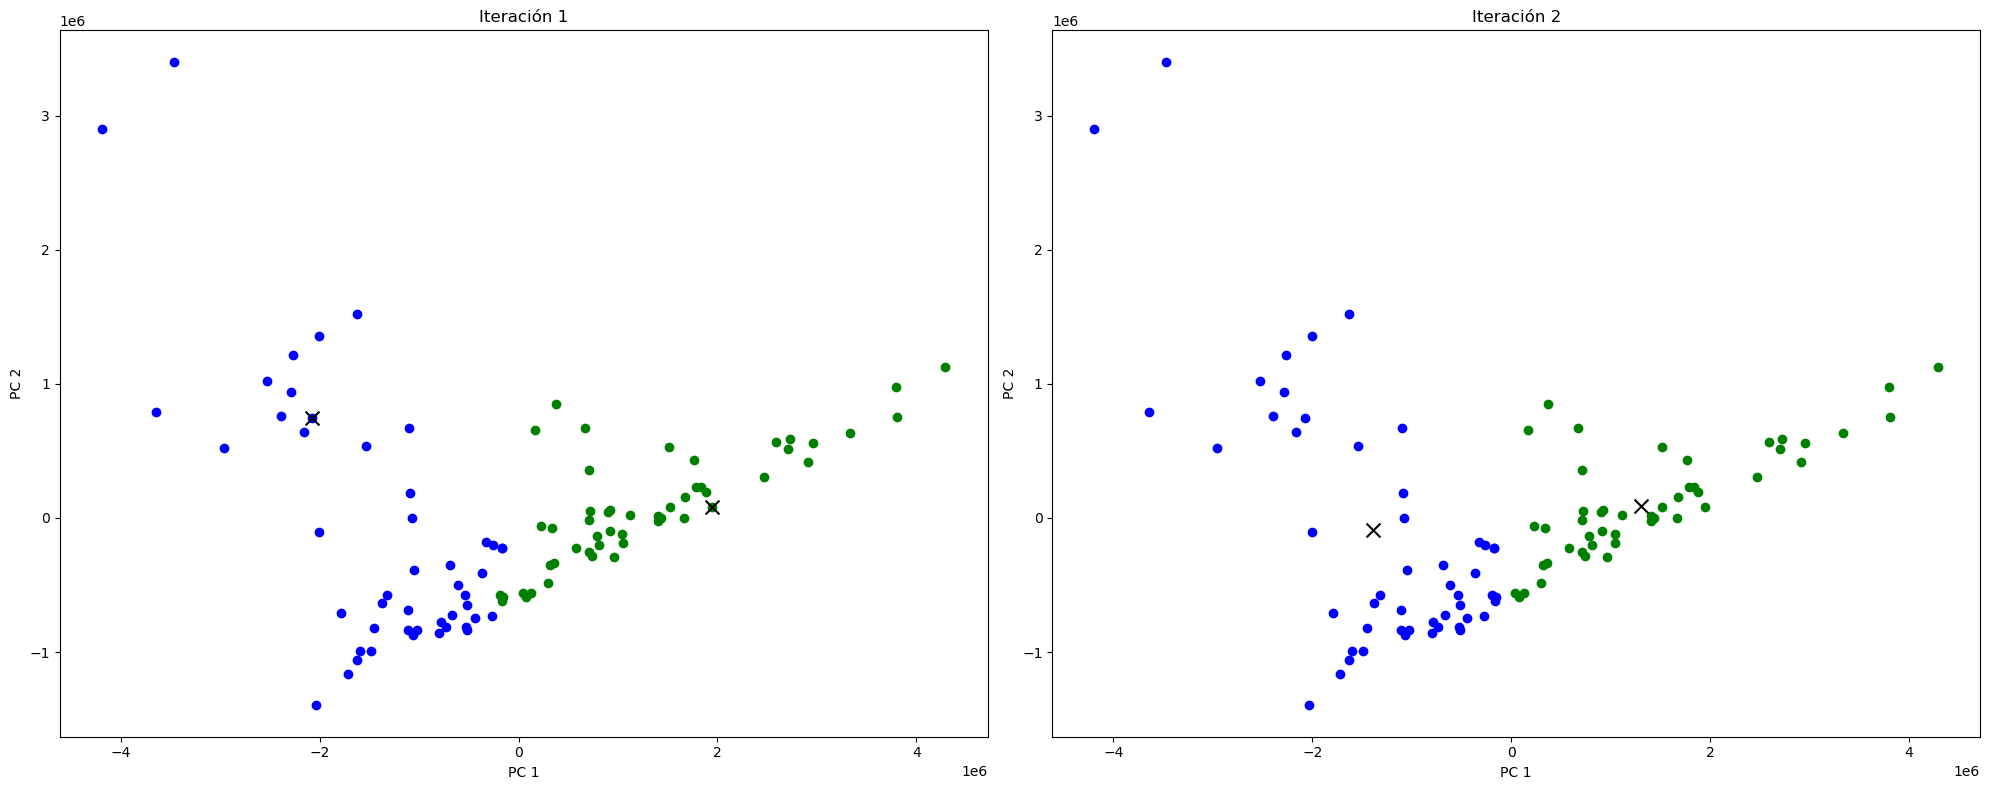

In [ ]:
# Graficar las iteraciones
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

for i, (centroids, labels) in enumerate(zip(centroids_history, labels_history)):
    pintar_clusters(axes[i], centroids, labels, principalComponents.values)
    axes[i].set_title(f"Iteración {i+1}")

plt.tight_layout()
plt.show()

En conclusión podemos ver que en cualquiera de los dos criterios, hay dos grupos bien diferenciados. Pero en el criterio de los centroides random los grupos se ven mejor diferenciados y agrupados en función de su centroide correspondiente. De manera que al introducir un nuevo elemento, sea más fácil agruparlo que si el criterio fuera k-means++, dónde los puntos de la gráfica están más agrupados por lo que sería más difícil diferenciar el grupo al que pertenece, de forma correcta.

<div id='id3'/>

## Apartado 3 - Estudia  qué técnicas  de  preprocesamiento  se  podrían  incluir  en  base  al  error  cometido  en  cada  cluster
---

Para responder esta pregunta, nos debemos ir al principio de la inicialización de los datos. En el procesamiento se eliminan las columnas que no nos aportan ningún dato relevante acerca de los jugadores. Tales como:

"player_name", "tracker_id", "solo_RevivesPg", "solo_WeaponAcquired", "solo_Revives", "solo_DBNOs", "duo_WeaponAcquired", "squad_WeaponAcquired"

* Las dos primeras se eliminan porque son el nombre e id del jugador.
* Las demás son columnas las cuales todos los jugadores tienen un 0 en el dato, por lo tanto, podemos eliminarlas.

Una vez hecho esto, se realiza un algoritmo K-means sin ningún tipo de preprocesamiento (sin ningún algoritmo ni normalización).
Se observa que los datos de la Silueta comparados con los obtenidos en el apartado 2, son peores. Cuanto mejor sean estos datos, mejor será la calidad de los clústers obtenidos.

Por esto se decide realizar un algoritmo PCA para reducir la dimensionalidad del problema, y además se decide realizar una normalización de los datos del DataFrame, ya que los datos son muy dispares.

In [ ]:
# Definir los parámetros para el algoritmo K-means
n_clusters = [2, 3, 4, 5, 6]
distances = ['euclidean', 'manhattan', 'cosine']

results = []
for n in n_clusters:
    for d in distances:
        kmeans = KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter=300, random_state=0)
        kmeans.fit(DataF_preparado)
        silhouette = silhouette_score(DataF_preparado, kmeans.labels_)
        results.append({'n_clusters': n, 'distance': d, 'silhouette_score': silhouette, 'iterations': kmeans.n_iter_})

# Visualizar los resultados en una tabla
DataF_resultados = pd.DataFrame(results)
# Lo ordenamos por las menores iteraciones
#DataF_resultados = DataF_resultados.sort_values(by='iterations')
print(DataF_resultados)

    n_clusters   distance  silhouette_score  iterations
0            2  euclidean          0.435420           2
1            2  manhattan          0.435420           2
2            2     cosine          0.435420           2
3            3  euclidean          0.442931           6
4            3  manhattan          0.442931           6
5            3     cosine          0.442931           6
6            4  euclidean          0.436844           6
7            4  manhattan          0.436844           6
8            4     cosine          0.436844           6
9            5  euclidean          0.435707           5
10           5  manhattan          0.435707           5
11           5     cosine          0.435707           5
12           6  euclidean          0.362747          12
13           6  manhattan          0.362747          12
14           6     cosine          0.362747          12


En el Apartado 2, la puntuación de la Silueta (después del PCA y la Normalización) es mayor para 2 iteraciones.